# Capstone Report - Market Segmentation
### Tashlin Reddy
### Springboard - Data Science Intensive

#### 1.Problem to be Solved
According to PwC’ research Fragmentation and Simplification released on 2015 “in both developed and emerging markets, there is a wider variety among consumers now than at any time in the recent past.” Their finding reveals that although there is shrinking in the middle, there is growth at the top and bottom of the market. The top of the market comprises the consumers spending more on higher priced items, as well as buying more items in general. In comparison, the bottom of the market includes an increasing amount of customers focusing on the value of goods. As stated before, the variety in the consumer base is at an all-time high. Consumers are changing and becoming more complex. The industry of marketing consumer goods, therefore, needs to know their customers to the slightest detail on order to remain competitive and not to loose presence in the market.. In the past, the middle of the market has played a major role in driving the consumer goods industry. This segment of the market, however, is shrinking and a readjustment in focus should occur. A proactive approach would entail not only having a profound understanding of their consumers but also making this knowledge a competitive advantage. The question therefore arises: How can the consumer base be targeted in the most efficient possible manner?

#### 2.The Client
Coop is a system of Italian consumer cooperatives which operates the largest supermarket chain in Italy. As of 2010, Coop's system operates with 115 consumers' cooperatives of various sizes (9 large, 14 medium, and 92 small), with 1,444 shops, 56,682 employers, more than 7.429.847 members, and an annual revenue of €12.9 billion. Since Coop. has a customer base it needs to be able to target market their customers. This will help maintain customer satisfaction by tailoring their stores according to different segments identified in our research. Such segmentation will also allow Coop to target new customers. 


#### 3.Data
The data is a condensed version of customers shopping habits and distances from 5 of Coop Italia's shops.

Import fields

Data pertaining to each individual shop
    distance to each shop
    amount  of product purchased 
    unique products purchased
    amount purchased
    average purchase 
    average price of items
Amount of shops used



The data collected is a reduced dataset, therefore all the fields are quite necessary in forming a sound analysis. Some of the important data is implicitly stated or can be approximated from the fields given.
For example:
Shopping Frequency can be calculated from (amount_purchased/avg_purchase)
If they buy the same items multiple times —> (products_purchased / unique_products_purchased)
Store Variety -  take the max of all the customers unique_products_purchased at each shop.

Drawbacks of the Data
There is no customer history or their social class or income
There is no information of the geolocation of branches or relative location of one to another. 
There is no information regarding exact items on sale at each store. This makes difficult to provide reliable information on possible overlap of products offered in each store. 

Bottom line, the dataset includes 5 arbitrary stores. It seems like all the stores are within a small geographic area, as some customers shop at all the stores. But as COOP Italia is Italy's largest supermarket chain, with over 100 stores across all of Italy, it is difficult to make a statement as to which stores this dataset may include.


In [1]:
#Import needed libraries
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os



# For statistical tests
import scipy.stats as st


In [2]:
#import data from COOP Italia
df = pd.read_csv('data/spcapstone.csv')
df.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,...,10.441143,14.862848,0.000000,0.0,0.000000,6.393403,2.600485,0.000000,0.0,0.000000
1,2,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,...,3.761943,4.848720,2.546600,0.0,16.479185,2.851152,2.009863,2.059450,0.0,2.103394
2,3,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,...,3.757062,5.605183,1.923385,0.0,5.924268,3.426687,2.478529,1.923385,0.0,1.947067
3,4,561.65900,362.79178,2210.3820,648.0,208.0,1679.520,5.976940,2.614292,4.0,...,4.997400,2.688400,5.029184,0.0,7.156351,4.997400,2.688400,2.083168,0.0,2.754427
4,5,605.36280,275.46753,1375.1184,13.0,10.0,17.922,1.792200,1.692000,2.0,...,0.000000,0.967667,2.145571,0.0,0.000000,0.000000,0.633667,2.145571,0.0,0.000000


In [3]:
#check percentage of how many NaN values there are
percnan = (df.isnull().sum().sum()/float(df.size))*100
print "percentage of NaN values is" , percnan, "%"

percentage of NaN values is 0.000372726369148 %


In [4]:
# this value is extremely low so we can remove the NaN values without worrying about future issues with the analysis
df = df.dropna()

In [5]:
#check to make sure
(df.isnull().sum().sum()/float(df.size))*100

0.0

In [6]:
list(df.columns.values) # show names of all columns for help with analysis

['customer_id',
 'avg_distance_to_shops',
 'min_distance_to_shops',
 'max_distance_to_shops',
 'products_purchased',
 'unique_products_purchased',
 'amount_purchased',
 'avg_purchase',
 'avg_price',
 'shops_used',
 'distance_shop_1',
 'distance_shop_2',
 'distance_shop_3',
 'distance_shop_4',
 'distance_shop_5',
 'products_purchased_shop_1',
 'products_purchased_shop_2',
 'products_purchased_shop_3',
 'products_purchased_shop_4',
 'products_purchased_shop_5',
 'unique_products_purchased_shop_1',
 'unique_products_purchased_shop_2',
 'unique_products_purchased_shop_3',
 'unique_products_purchased_shop_4',
 'unique_products_purchased_shop_5',
 'amount_purchased_shop_1',
 'amount_purchased_shop_2',
 'amount_purchased_shop_3',
 'amount_purchased_shop_4',
 'amount_purchased_shop_5',
 'avg_purchase_shop_1',
 'avg_purchase_shop_2',
 'avg_purchase_shop_3',
 'avg_purchase_shop_4',
 'avg_purchase_shop_5',
 'avg_price_shop_1',
 'avg_price_shop_2',
 'avg_price_shop_3',
 'avg_price_shop_4',
 'avg_p

In [7]:
num_customers = df.shape[0]
num_customers

60365

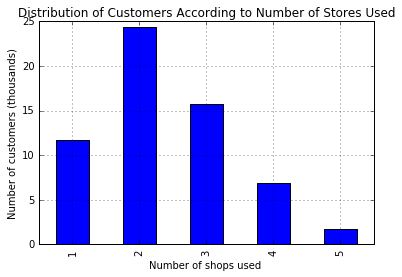

In [8]:
# first let's check how many shops are used by the customers
list_purchase = []
for k in range(1,6):
    aux_ = sum(df['shops_used']== k)
    perc_ = float(aux_/1000.)
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Number of Shops Used'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Number of Shops Used',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Number of Stores Used',
           legend=False,grid=True)
plt.xlabel('Number of shops used ')
plt.ylabel('Number of customers (thousands)')
plt.show()

As we can see from the graph above, most customers use 2 stores, followed 3, and 1 store. The minority use 4 or all 5 shops. 

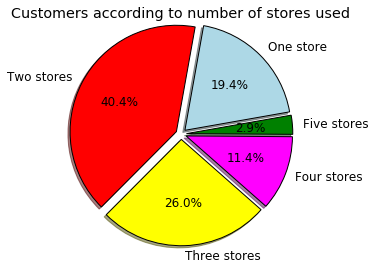

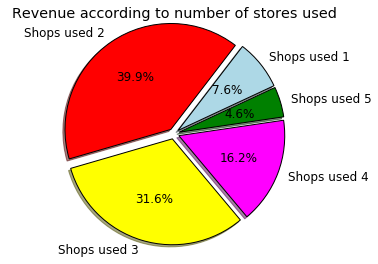

In [9]:
# show the distribution of how many stores customers shop at
# we will compare this to the revenue of each of the groups of customers 
list_purchase = []
labels_ = ["One store","Two stores","Three stores","Four stores","Five stores"]
colors = ['lightblue','red','yellow','magenta','green']
explode = (0.05,0.05,0.05,0.05,0.05)
for k in range(1,6):
    aux_ = sum(df['shops_used']== k)
    perc_ = float(aux_)
    list_purchase.append(perc_)
list_purchase = np.array(list_purchase) 
list_purchase = list_purchase*100./sum(list_purchase)

#distribution according to revenue
testdf= pd.DataFrame()
test = []

for i in range(1,6):
    a = 'amount_purchased'
    b = df[df['shops_used']==i][a].sum()
    test.append(b)
testdf['amount_purchased'] = test

#plot Customers according to number of stores used
    
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=10)

plt.axis('equal')

plt.title('Customers according to number of stores used')

plt.show()

#Plot revenue according to number of stores used

labels_ = ["Shops used 1","Shops used 2","Shops used 3","Shops used 4","Shops used 5"]
colors = ['lightblue','red','yellow','magenta','green']
#list_purchase = np.array(list_purchase) 
#list_purchase = list_purchase*100./sum(list_purchase)
list_purch =  testdf['amount_purchased'].tolist()
explode = (0.05,0.05,0.05,0.05,0.05)
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purch,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=25)

plt.axis('equal')

plt.title('Revenue according to number of stores used')

plt.show()

####  from the above chart, 40% of total revenue come from customers who use only 2 shops. 30% from those who use 3 shops, and so on... 

Let's figure out which of the shops the customers purchase at the most.

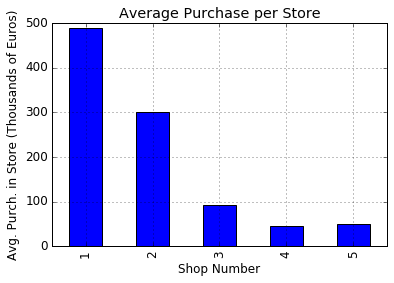

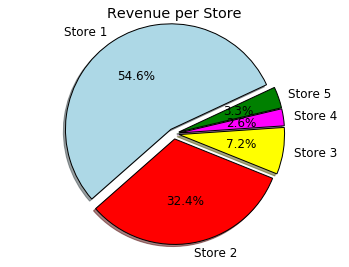

In [10]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_purchase_shop_' + str(k)
    aux_ = df[text_].sum()/1000.
    list_purchase.append(aux_)
dfAux = pd.DataFrame()
dfAux['Store Number'] = [1,2,3,4,5]
dfAux['Avg. Purchase in Shop'] = list_purchase

#distribution according to revenue from each shop
testdf= pd.DataFrame()
test = []

for i in range(1,6):
    a = 'amount_purchased_shop_'+str(i)
    b = df[a].sum()
    test.append(b)
testdf['amount_purchased'] = test

dfAux.plot(x='Store Number',y='Avg. Purchase in Shop',kind='bar',
           title='Average Purchase per Store',legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Avg. Purch. in Store (Thousands of Euros)')
plt.show()


#Plot revenue according to number of stores used

labels_ = ["Store 1","Store 2","Store 3","Store 4","Store 5"]
colors = ['lightblue','red','yellow','magenta','green']
#list_purchase = np.array(list_purchase) 
#list_purchase = list_purchase*100./sum(list_purchase)
list_purch =  testdf['amount_purchased'].tolist()
explode = (0.05,0.05,0.05,0.05,0.05)
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purch,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=25)

plt.axis('equal')

plt.title('Revenue per Store')

plt.show()

It looks like shop1 brings in the most revenue, followed by shop2. It would suggest that most of the customers purchase at shop1. Let's find out. 

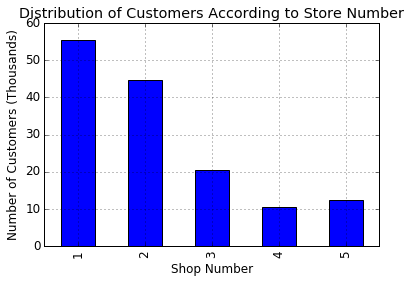

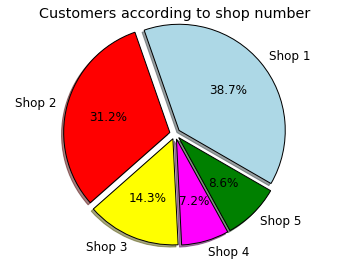

In [11]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_price_shop_' + str(k)
    aux_ = sum(df[text_] != 0)
    perc_ = float(sum(df[text_] != 0)/1000.)
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Shop Number',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Store Number',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of Customers (Thousands)')
plt.show()

# Pie chart

labels_ = ["Shop 1","Shop 2","Shop 3","Shop 4","Shop 5"]
colors = ['lightblue','red','yellow','magenta','green']
list_purchase = np.array(list_purchase) 
list_purchase = list_purchase*100./sum(list_purchase)
 
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=-30)

plt.axis('equal')

plt.title('Customers according to shop number')

plt.show()

The above graphs show the total amount of transactions distributed over the 5 shops. This includes customers whos make transactions at multiple stores. 

In [12]:
df['freq'] = pd.DataFrame(df.amount_purchased/df.avg_purchase)
for i in range(1,6):
    a = 'freq_shop_'+str(i)
    b = 'amount_purchased_shop_' +str(i)
    c = 'avg_purchase_shop_'+ str(i)
    df[a] = pd.DataFrame(df[b]/df[c])
df.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5,freq,freq_shop_1,freq_shop_2,freq_shop_3,freq_shop_4,freq_shop_5
0,1,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,...,2.600485,0.000000,0.0,0.000000,531.000005,76.999999,454.000001,NaN,NaN,NaN
1,2,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,...,2.009863,2.059450,0.0,2.103394,695.999990,104.999999,175.000000,20.000000,NaN,395.999984
2,3,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,...,2.478529,1.923385,0.0,1.947067,328.000007,32.000001,104.000002,12.999999,NaN,178.999999
3,4,561.65900,362.79178,2210.3820,648.0,208.0,1679.520,5.976940,2.614292,4.0,...,2.688400,2.083168,0.0,2.754427,280.999991,20.000000,5.000000,125.000000,NaN,131.000003
4,5,605.36280,275.46753,1375.1184,13.0,10.0,17.922,1.792200,1.692000,2.0,...,0.633667,2.145571,0.0,0.000000,10.000000,NaN,3.000000,7.000000,NaN,NaN


In [13]:
df.isnull().sum()

customer_id                             0
avg_distance_to_shops                   0
min_distance_to_shops                   0
max_distance_to_shops                   0
products_purchased                      0
unique_products_purchased               0
amount_purchased                        0
avg_purchase                            0
avg_price                               0
shops_used                              0
distance_shop_1                         0
distance_shop_2                         0
distance_shop_3                         0
distance_shop_4                         0
distance_shop_5                         0
products_purchased_shop_1               0
products_purchased_shop_2               0
products_purchased_shop_3               0
products_purchased_shop_4               0
products_purchased_shop_5               0
unique_products_purchased_shop_1        0
unique_products_purchased_shop_2        0
unique_products_purchased_shop_3        0
unique_products_purchased_shop_4  

In [14]:
df = df.fillna(0) # filling with zeros, because the visits those customers with NaN values make are 0

In [15]:
df.isnull().sum().sum() # check to make sure all NaN values are filled with 0

0

In [16]:
testdf= pd.DataFrame()
test = []
for k in range(1,6):
    for i in range(1,6):
        a = 'freq_shop_'+str(i)
        b = df[df['shops_used']==k][df[a]>0][a].mean()
        test.append(b)
        
fun= [0,5,10,15,20,25]
for i in range(len(fun)-1):
    c = 'shops_used_'+str(i+1)
    testdf[c] = test[fun[i]:fun[i+1]]
    
testdf.index = range(1,6)
   
#df[df['shops_used']==2][df['amount_purchased_shop_1']>0][df['amount_purchased_shop_2']>0].amount_purchased.sum()

/Users/tashlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [17]:
testdf

,shops_used_1,shops_used_2,shops_used_3,shops_used_4,shops_used_5
1,169.317641,220.271119,271.705924,306.662237,335.238805
2,124.629959,184.443711,166.235462,158.463579,163.537313
3,115.957684,101.862888,87.398703,97.966060,101.926521
4,100.119247,84.738176,67.325674,57.942012,50.799656
5,87.972393,102.165082,77.486966,68.362706,76.136625


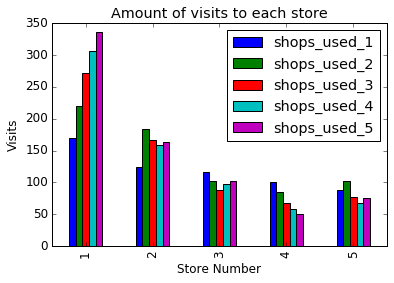

In [18]:
dfAux['Store Number'] = [1,2,3,4,5]
testdf.plot.bar(x=dfAux['Store Number'], y=None)
plt.ylabel('Visits')
plt.title('Amount of visits to each store')


#### Graph above shows that for store 1, customers who use more stores, visit store 1 more frequently
Hypothesis 1: Customers who use more stores, spend more money on a per individual bases

Hypothesis 2: Customers who use exclusively one store, are bulk buyers

In [19]:
testdf2 = pd.DataFrame()
for i in range(1,6):
    c = 'shops_used_'+str(i)
    b = df[df['shops_used']==i].amount_purchased.mean()
    testdf2[c] = [b]
tt = testdf2.transpose()

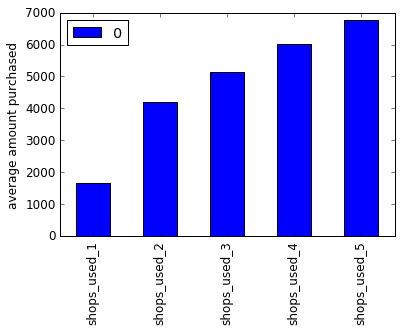

In [20]:
tt.plot.bar(x=None, y=None)
plt.ylabel('average amount purchased')

#### Customers who use more shops  do indeed purchase more in total. But we can not forget that most customers use 2 shops followed by 3, then 1, with customers using 4 and 5 shops, a small minority

Let's turn our attention to distance to each of the shops. Maybe some shops are more dependant on distance than others.

In [21]:
df[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730


In [22]:
#transform to numpy array for analysis
dist_ = df[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].values
print dist_

[[ 4082.5222    985.8762   2372.097    4929.8047   3284.3867 ]
 [ 1115.3433   2295.484     670.9008   2048.0605    254.94832]
 [ 1418.8348   2831.7727   1286.819    1545.1963    754.2956 ]
 ..., 
 [  938.86285  2375.3333    785.6533   2044.8994    247.7872 ]
 [ 1727.252    1846.5889   1124.2445   3185.135    1456.6217 ]
 [ 1025.5867   3444.8223   1823.8531    869.9029    959.00525]]


In [23]:
# Empty lists
closest = []
farthest = []
# For every customer (columns in previous matrix )...
for k in range(df.shape[0]):
    # ... find the index that corresponds to the maximum and minimum 
    # distances and add one to it (remember indexing in Python begins
    # at zero while the indexing at customer number begins at one) ...
    Min =  1+ dist_[k,:].argmin()
    Max =  1+ dist_[k,:].argmax()
    #  ... and add each value to corresponding list
    closest.append(Min)
    farthest.append(Max)
# Finally add columns to the data frame
df['closest_shop'] = closest
df['farthest_shop'] = farthest

In [24]:
df[['closest_shop','farthest_shop']].head()

,closest_shop,farthest_shop
0,2,4
1,5,2
2,5,2
3,5,2
4,3,4


We will focus on distance to each of the shops first. Maybe some shops are more dependant on distance than others.

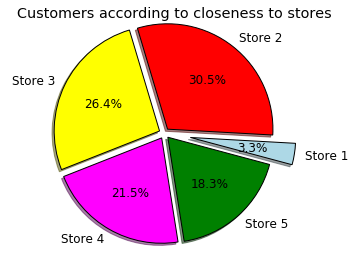

In [25]:
list_purchase = []
labels_ = ["Store 1","Store 2","Store 3","Store 4","Store 5"]
colors = ['lightblue','red','yellow','magenta','green']
explode = (0.25,0.05,0.05,0.05,0.05)
for k in range(1,6):
    aux_ = sum(df['closest_shop'] == k)
    perc_ = float(aux_)*100./float(df.shape[0])
    list_purchase.append(perc_)

    
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=-15)

plt.axis('equal')

plt.title('Customers according to closeness to stores')

plt.show()


Interestingly, we see that only 3.3% of customers are closest to store 1, and yet that store brings in the most revenue. We will keep this in mind for further analysis.
Also worthwhile noting that Store 2, which brings in the next highest revenue, has the most amount of customers closest to it. 

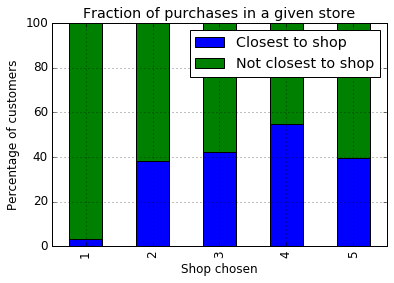

In [26]:
# Fraction of people who purchase in a given store that live closest to it

# Set empty lists and empty data frame
listA = []; listB = []
df_stack = pd.DataFrame()
# Auxiliary test to extract desired values
text_ = 'amount_purchased_shop_'
# For each of the five stores...
for k in range(1,6):
    # ... the total number of customers who purchased at 
    # the store in turn ...
    a = sum((df[text_ + str(k)] != 0.)) 
    # ... and from that total number, get the ones that ALSO live 
    # closest to the store in turn.
    b = sum((df[text_ + str(k)] != 0.) & (df.closest_shop == k))
    
    # From the customers who purchase at a given store we determine the 
    # fraction of them that live the closest to the store in question
    fract_ = float(b)/float(a)
    # Store the complement (the ones who DO NOT live closest to store)...
    listA.append((1. - fract_)*100.)
    # ... and the fraction itself
    listB.append(fract_*100.)

# Create dataframe to make the stacked bar plots
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# And plot
matplotlib.rcParams.update({'font.size': 12})
df_stack.plot(kind='bar',
           title='Fraction of purchases in a given store',stacked=True,
              grid=True)

plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

In [27]:
df_stack

,Closest to shop,Not closest to shop
1,3.409418,96.590582
2,38.183685,61.816315
3,42.013364,57.986636
4,54.961538,45.038462
5,39.644208,60.355792


Only about 3.4% of customers who purchase from Store 1, actually live the closest. Where as stores 2,3, and 5's have about 40% of their customers closest to each store.

At the beginning it was noted that most customers shop at 1-3 stores. Let's focus on customers who purchase exclusively at 1 shop. 

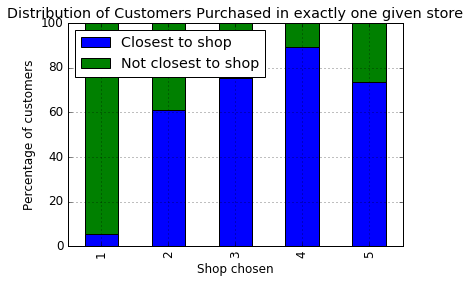

In [28]:
# Empty lists and dataframe
listA = [];listB = []
df_stack = pd.DataFrame()

# Auxiliary text to filter data of interest
text_ = 'amount_purchased_shop_'

# For each store...
for k in range(1,6):
    
    # Get number of customers that purchased in the store in turn and ONLY in that store...
    a =  sum((df[text_ + str(k)] != 0.) & (df.shops_used == 1))
    # ... and extract from them those who are closest to the store in turn
    b = sum((df[text_ + str(k)] != 0.) & (df.shops_used == 1) &
            (df.closest_shop == k))
    
    # From the previous to numbers get the fraction desired...
    fract_ = float(b)/float(a)

    # ... and store it, as well as its complement, in the corresponding
    # lists created before
    listA.append((1. - fract_)*100.)
    listB.append(fract_*100.)
    

# Create the corrsponding dataframe ...
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# ... and plot
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

In [29]:
df_stack

,Closest to shop,Not closest to shop
1,5.571554,94.428446
2,60.971660,39.028340
3,75.278396,24.721604
4,89.121339,10.878661
5,73.619632,26.380368


So only 5.5% of customers who purchase at exclusively store 1, live closest to it. Meaning most store 1 customers choose store 1 over a closer store. Why?
Interestingly 90% of store 4 exclusive customers live closest to it. 

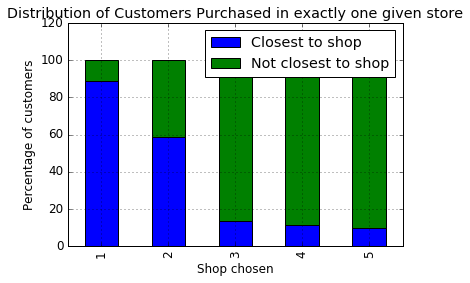

In [30]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT ONLY ONE GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

# Empty lists and dataframe
listA = [];listB = []
df_stack = pd.DataFrame()

# Auxiliary text to filter data of interest
text_ = 'amount_purchased_shop_'

# For each store...
for k in range(1,6):
    
    # Get number of customers that purchased ONLY in one store and live the closest
    # to the store in question
    a =  sum((df.closest_shop == k) & (df.shops_used == 1))
    # ... and extract from them those who purchased in that store
    b = sum((df[text_ + str(k)] != 0.) & (df.shops_used == 1) &
            (df.closest_shop == k))
    
    # From the previous to numbers get the fraction desired...
    fract_ = float(b)/float(a)

    # ... and store it, as well as its complement, in the corresponding
    # lists created before
    listA.append((1. - fract_)*100.)
    listB.append(fract_*100.)
    

# Create the corrsponding dataframe ...
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# ... and plot
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

    

Graph above shows customers fraction of customers who purchase at each store, that both, only purchase at one store exclusively, and live closest to that store. 


In [31]:
df_stack

,Closest to shop,Not closest to shop
1,88.822355,11.177645
2,58.644860,41.355140
3,13.784666,86.215334
4,11.219384,88.780616
5,10.033445,89.966555


So 89% of customers that live closest to store 1 and only shop at one store, purchase at store 1. Again why?
59% of customers closest to store 2, who shop exclusively at one store, choose to purchase there.
But less than 15% of customers who shop exclusively at one shop, who live closest to shops 3,4, and 5, decide to shop there. More than 85% of those customers closest to shop 3,4 and 5, purchase elsewhere. This would lead us to the hypothesis that stores 3,4, and 5, do not provide everything needed by exclusive customers.

In [32]:
# auxiliar text
text_ = 'amount_purchased_shop_'
# Set empty list that will keep track of each component per segment
one_store = []
# List that will store lists containing contributions from each store
closest_to_X = []
# Set to zero cumulative sum. This will be only used
# as a check
cumul_num = 0
# For evert store...
for k in range(1,6):
    # Subset the dataset to determine the group of one-store-buyers that
    # purchased in the store in turn
    dfX = df[ (df[text_+str(k)] != 0.) & (df.shops_used == 1) ]
    # Get number of customers from the dataframe in turn
    numX = dfX.shape[0]
    # Save such value in the created list ...
    one_store.append(numX)
    # ... and update cumulative sum
    cumul_num += numX
    
    # Store the recently created list into the remaining empty list
    closest_to_X.append( [sum(dfX.closest_shop == n) for n in range(1,6)] )
    
# Create an empty dataframe
df_close = pd.DataFrame()
# populate first column with total number of one-store-buyers according to each store
df_close['Total customers'] = one_store
# Create auxiliary text to populate rest of columns
text_ = 'Closest to '
# For each store ...
for m in range(5):
    # ... populate the corresponding column ...
    df_close[text_+str(m+1)] = [closest_to_X[k][m] for k in range(5)]
# ... and set indices in dataframe
df_close.index = range(1,6)  

In [33]:
# We check cumulative sum agains total number of one-shop-buyers
print cumul_num 
print sum(df.shops_used == 1)

11710
11710


In [34]:
df_close

,Total customers,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,7987,445,1019,1557,3112,1854
2,2470,18,1506,519,196,231
3,449,10,18,338,36,47
4,478,4,9,19,426,20
5,326,24,16,19,27,240


In [35]:
df_stack = df_close[['Closest to 1','Closest to 2','Closest to 3',
                     'Closest to 4','Closest to 5']]

In [36]:
df_stack

,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,445,1019,1557,3112,1854
2,18,1506,519,196,231
3,10,18,338,36,47
4,4,9,19,426,20
5,24,16,19,27,240


In [37]:
one = [np.sum(df_stack,1)]
zero = [np.sum(df_stack,0)]

In [38]:
print one[0][1]/float(cumul_num)
print one[0][2]/float(cumul_num)

0.682066609735
0.210930828352


In [39]:
df_stack.iloc[0,1]/float(zero[0][1]) # So 40% of customers closest 
#to store 2 travel to store 1

0.39680685358255452

In [40]:
df_stack.iloc[1,1]/float(one[0][2])

0.60971659919028343

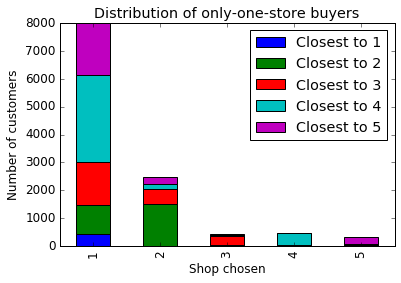

In [41]:
df_stack.plot(kind='bar',
           title='Distribution of only-one-store buyers',stacked=True)
plt.xlabel('Shop chosen')
plt.ylabel('Number of customers')
plt.show()

Of exclusively 1 shop customers, 70% shop at store 1 and 20%  shop at store 2. 

Interestingly less than 6% of the 70% live closest to store 1, but 60% (majority) of the 20% live closest to store 2.

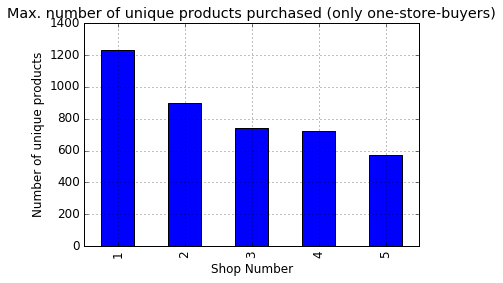

In [42]:
# Auxiliary texts for the processing
text_1 = 'unique_products_purchased_shop_'
text_2 = 'amount_purchased_shop_'
# Empty list to creat the needed dataframe
list_purchase = []
# For each store ...
for k in range(1,6):
    # ... we subset the dataset to find one-shop buyers and the individuals that purchased 
    # in the corresponding store
    aux_ = max(df[(df[text_2 + str(k)] != 0.) & (df.shops_used == 1) ][text_1 + str(k)].values)
    # Add such a number of the created list
    list_purchase.append(aux_)

# Create empty dataframe
dfAux = pd.DataFrame()
# Add columns
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of unique products'] = list_purchase
# ... and index it
#dfAux.index = range(1,6)

# Generate the plot
dfAux.plot(x='Shop Number',y='Number of unique products',kind='bar',
           title='Max. number of unique products purchased (only one-store-buyers)',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of unique products')
plt.show()


In [43]:
dfAux

,Shop Number,Number of unique products
0,1,1229
1,2,899
2,3,739
3,4,725
4,5,572


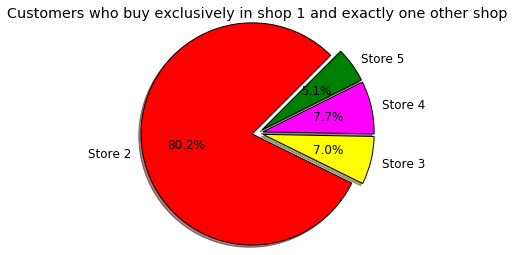

In [44]:
list_purchase = []
labels_ = ["Store 2","Store 3","Store 4","Store 5"]
colors = ['red','yellow','magenta','green']
explode = (0.05,0.05,0.05,0.05)
text_ = 'avg_purchase_shop_'
num_ = sum((df['shops_used'] == 2) & (df['avg_purchase_shop_1'] != 0))

cumul_ = 0
for k in range(2,6):
    aux_ = sum((df[text_ + str(k)] != 0) & (df['shops_used'] == 2) & (df['avg_purchase_shop_1'] != 0))   
    cumul_ += aux_
    perc_ = float(aux_)*100./float(num_)
    list_purchase.append(perc_)

matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=45)

plt.axis('equal')

plt.title('Customers who buy exclusively in shop 1 and exactly one other shop')

plt.show()


In [45]:
test1 = df[df['shops_used']==2].amount_purchased.sum()

In [46]:
test2 = df[df['shops_used']==2][df['amount_purchased_shop_1']>0][df['amount_purchased_shop_2']>0].amount_purchased.sum()

/Users/tashlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [47]:
twostoreone = test2/test1
print twostoreone*100,"%"

84.0288021038 %


In [48]:
print 39.9* twostoreone,"%"

33.5274920394 %


#### Interestingly 84% of revenue of customers who shop at 2 stores, are customers who shop exclusively at store 1 and 2, not anywhere else. That accounts for 33.5% of total revenue brought in by the market

In [49]:
test3 = df[df['shops_used']==1].amount_purchased.sum()

In [50]:
test4 = df[df['shops_used']==1][df['amount_purchased_shop_1']>0].amount_purchased.sum()

/Users/tashlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [51]:
onestoreone = test4/test3
print onestoreone*100,"%"

70.8365226135 %


In [52]:
print 7.6*onestoreone,"%"

5.38357571862 %


For later use, but customers who purchase exclusively at store 1, account for 5.3% of all revenue

/Users/tashlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


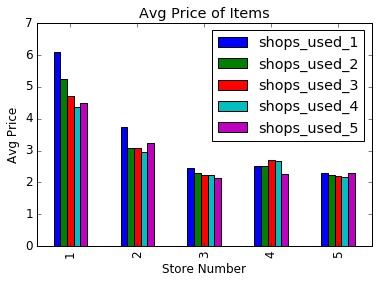

In [53]:
testdf= pd.DataFrame()
test = []
for k in range(1,6):
    for i in range(1,6):
        a = 'avg_price_shop_'+str(i)
        b = df[df['shops_used']==k][df[a]>0][a].mean()
        test.append(b)
        
fun= [0,5,10,15,20,25]
for i in range(len(fun)-1):
    c = 'shops_used_'+str(i+1)
    testdf[c] = test[fun[i]:fun[i+1]]
testdf.index = range(1,6)
dfAux['Store Number'] = [1,2,3,4,5]
testdf.plot.bar(x=dfAux['Store Number'], y=None)
plt.ylabel('Avg Price')
plt.title('Avg Price of Items')


In [54]:
testdf

,shops_used_1,shops_used_2,shops_used_3,shops_used_4,shops_used_5
1,6.096753,5.247905,4.705709,4.372586,4.500664
2,3.725740,3.078059,3.068956,2.938562,3.251213
3,2.448476,2.291663,2.241849,2.223317,2.152325
4,2.518477,2.516588,2.702860,2.677836,2.278767
5,2.290352,2.242867,2.195909,2.166246,2.286964


From the graph above it looks like customers who shop at only one store, pay the highest average price per item.

Let's remember that most customers use 2 stores followed by 3 and 1. 
And the most of the revenue is brought in by customers who shop at 2 stores, followed by 3 and 4. With 7.6% of revenue falling to exclusively the one store customers. 

We will set up some A/B testing to check our hypothesis and compare to distributions.

In [55]:
def comparis_(field_1,field_2,alpha_,name_1,name_2,shop):
    if ((len(field_1) < 30) | (len(field_2) < 30)):
        print "Your samples do NOT seem to be large enough"
        print "Difference in prices of items in store",shop,"for",name_1, "and" , name_2 
        return len(acol),len(bcol)
    else:
        stat, pval = st.mannwhitneyu(field_1, field_2)
        if pval > alpha_:
            print 'z score = ' , stat
            print 'p value = ' ,pval
            print 'Null hypothesis is' , pval > alpha_
            print "Difference in prices of items in store",shop,"for",name_1, "and" , name_2 
            print "may have been due to chance"
            print "######"*10
    

In [56]:
for i in range(1,6):
    text_1 = 'amount_purchased_shop_' +str(i)
    text_2 = 'avg_price_shop_'+ str(i)
    for j in range(1,6):
        b = df[df['shops_used']==j][df[text_1]>0][text_2]
        loop = j+1
        for k in range(loop,6):
            if j!=k:
                c = df[df['shops_used']==k][df[text_1]>0][text_2]
                comparis_(b,c,0.05,j,k,i)

/Users/tashlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/tashlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


z score =  13152608.0
p value =  0.0684205703167
Null hypothesis is True
Difference in prices of items in store 1 for 3 and 5
may have been due to chance
############################################################
z score =  5972889.0
p value =  0.928603221186
Null hypothesis is True
Difference in prices of items in store 1 for 4 and 5
may have been due to chance
############################################################
z score =  24282426.0
p value =  0.645513665111
Null hypothesis is True
Difference in prices of items in store 2 for 1 and 2
may have been due to chance
############################################################
z score =  48517316.0
p value =  0.132960084493
Null hypothesis is True
Difference in prices of items in store 2 for 3 and 4
may have been due to chance
############################################################
z score =  12671219.0
p value =  0.36915029556
Null hypothesis is True
Difference in prices of items in store 2 for 3 and 5
may have been due to

Let's remind ourselves that we're trying to find out if, customers who purchase in more stores buy items that are less expensive than customers who purchase in less stores. Maybe shops used has a relation to customers looking for lower prices

According to these tests and inference from the above graph: 
Store 1:
Exclusively one shop customers purchase the most expensive items at store 1.
2 shop customers a little less
Followed by customers who use 3,4, and 5 shops, all of which, we can group together. 

Store 2: 
Customer who purchase from 1 and 2 shops in total, purchase similiar priced items.
    NOTE: This indirectly shows that of customers who use 2 shops, those stores being exclusively store 1 and 2, buy cheaper items than exclusively one store customers at store 1. 
Customers who use 3,4, and 5 shops who purchase at store two purchase similar priced items, significantly cheaper than those who purchase from 1 or 2 stores.

Store 3:
Again, Customers who use 3,4, and 5 shops who purchase at store Three purchase similar priced items, significantly cheaper than those who purchase from 1 or 2 stores.
Exclusive store 3 customers buy the most expensive items


In [57]:
def ABTest_Proportions(data,field_1,field_2,alpha_):
    acol = np.array(df[df.shops_used == 1][field_1].apply(lambda x: 1. if x !=0 else 0 ))
    bcol = np.array(df[df.shops_used == 1][field_2].apply(lambda x: 1. if x !=0 else 0 ))
    
    if ((len(acol) < 30) | (len(bcol) < 30)):
        print "Your samples do not seem to be large enough"
        return len(acol),len(bcol)
    else:
        # Compute proportions
        a_proportion = sum(acol)/len(acol)
        b_proportion = sum(bcol)/len(bcol)
        # Test statistic
        test_statistic = (a_proportion - b_proportion )
        # Pooled proportion
        pooled_proportion = (sum(acol) + sum(bcol))/(len(acol) + len(bcol)) 
        # Standard error
        SError = np.sqrt(pooled_proportion*(1-pooled_proportion)* (1./len(acol) + 1./len(bcol))  ) 
        # Z-score
        z_score = test_statistic / SError
        p_value = st.norm.sf(abs(z_score)) #one-sided
        print 'z score = ' , z_score
        print 'p value = ' , p_value
        print 'Null hypothesis is' , p_value > alpha_
        print "Difference in proportions between" , field_1 , "and" , field_2 
        if p_value > alpha_:
            print "may have been due to chance"
        else: 
            print "may NOT have been due to chance"
        print "######"*10

In [58]:
text_ = 'amount_purchased_shop_'
for i in range(1,6):
    for j in range(i+1,6):
        print "Comparing proportions for shops "  + str(i) + " and " + str(j)
        ABTest_Proportions(df,'amount_purchased_shop_'+str(i),'amount_purchased_shop_'+str(j),0.05)

Comparing proportions for shops 1 and 2
z score =  72.5170476884
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_purchased_shop_1 and amount_purchased_shop_2
may NOT have been due to chance
############################################################
Comparing proportions for shops 1 and 3
z score =  102.604736824
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_purchased_shop_1 and amount_purchased_shop_3
may NOT have been due to chance
############################################################
Comparing proportions for shops 1 and 4
z score =  102.133651649
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_purchased_shop_1 and amount_purchased_shop_4
may NOT have been due to chance
############################################################
Comparing proportions for shops 1 and 5
z score =  104.619081505
p value =  0.0
Null hypothesis is False
Difference in proportions between amount_pu

Our AB tests executed indicate that only in the pair of shops 3 and 4 the difference in proportion between these two groups may have been due to chance. This somehow is reflected in the previous bar plot as the difference in the number of unique products purchased in those two groups is only 14. In the other two pairs the difference in number of unique products is, at least, 150. This may indicate that the driver in customers' decisions in what shop to buy, more than anything else, is variety of products. It would be nice to have more information regarding the specific type of products offered in each store.
Let's try to cluster customers based on unique number of proucts purchased in every store as well as the distance to every store. We first attempt to cluster customers who buy exclusively in only two stores

In [59]:
from sklearn.cluster import KMeans

In [60]:
# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = df[(df.shops_used == 2)][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5']].values


# We split dataset into training set (70%) and test set (30%)
train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(17053, 5)


In [61]:
from sklearn import preprocessing

In [62]:
print train_2.mean(axis=0)
print train_2.std(axis=0)

[ 211.38462441  148.40397584    9.24312438    6.76713775    6.19339706]
[ 206.72933063  185.86749574   51.96312899   42.22833103   42.18171157]


In [63]:
train_2 = preprocessing.scale(train_2)
print train_2.mean(axis=0)
print train_2.std(axis=0)

[  1.13053556e-16  -2.45215213e-16   3.38198426e-15  -5.27849102e-16
   6.93073959e-16]
[ 1.  1.  1.  1.  1.]


/Users/tashlin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


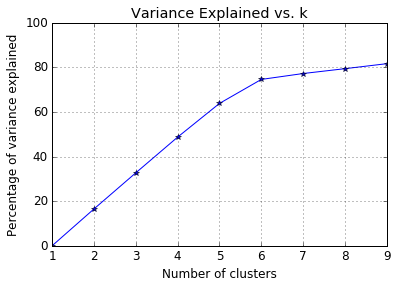

In [64]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


In [65]:
#We choose 6 clusters based on the variance explained in the graph above, using the elbow method
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2) #k_means.fit(test_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0] #df_clusters['shop_1'] = test_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

In [66]:
df_clusters.head()

,shop_1,shop_2,shop_3,shop_4,shop_5,cluster
0,-0.858053,-0.174339,-0.177879,-0.160251,-0.146827,1
1,0.080373,0.342158,-0.177879,-0.160251,-0.146827,1
2,0.448003,-0.255042,-0.177879,-0.160251,-0.146827,4
3,2.982718,-0.604753,-0.177879,-0.160251,-0.146827,4
4,1.139729,-0.249662,-0.177879,-0.160251,-0.146827,4


In [67]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df2 = pd.DataFrame()
for k in range(5):
    df2['Shop ' + str(k+1)] = matrix_clusters[:,k]
df2.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]


In [68]:
df2

,Shop 1,Shop 2,Shop 3,Shop 4,Shop 5
1,9111.0,9111.0,9111.0,9111.0,9111.0
2,264.0,264.0,264.0,264.0,264.0
3,3498.0,3498.0,3498.0,3498.0,3498.0
4,3638.0,3638.0,3638.0,3638.0,3638.0
5,233.0,233.0,233.0,233.0,233.0
6,309.0,309.0,309.0,309.0,309.0


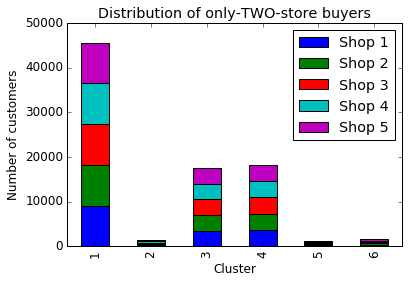

In [69]:
df2.plot(kind='bar',
           title='Distribution of only-TWO-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

####  Something looks NOT right, scaling seems to be the issue. Within each cluster, their are the same number of customers from each shop used, which should NOT be the case. Especially since, amount spent in each store across the different store holds the same value. We know shop 1 brings in more revenue than shop 5, so we want to retain that variance and not normalize it. 

In [70]:
#Lets try without scaling.

In [71]:
# We import tools to split dataset into train and test sets
#step 1
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = df[(df.shops_used == 2)][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5']].values


# We split dataset into training set (70%) and test set (30%)
train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(17053, 5)


In [72]:
unique_2.shape

(24362, 5)

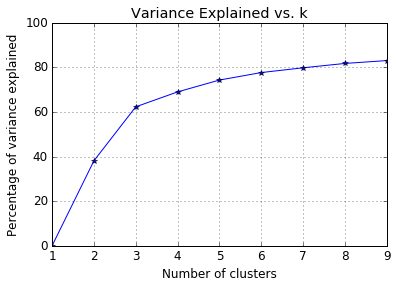

In [73]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


In [74]:
#again using the elbow method I decide on 6 clusters 
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2) #k_means.fit(test_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0] #df_clusters['shop_1'] = test_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

/Users/tashlin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [75]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df2 = pd.DataFrame()
for k in range(5):
    df2['Shop ' + str(k+1)] = matrix_clusters[:,k]
df2.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]
df2

,Shop 1,Shop 2,Shop 3,Shop 4,Shop 5
1,6301.0,4618.0,1062.0,954.0,701.0
2,1423.0,1453.0,21.0,4.0,5.0
3,1535.0,1211.0,111.0,108.0,105.0
4,3407.0,2577.0,279.0,338.0,213.0
5,1359.0,1359.0,0.0,0.0,0.0
6,2395.0,2481.0,59.0,10.0,17.0


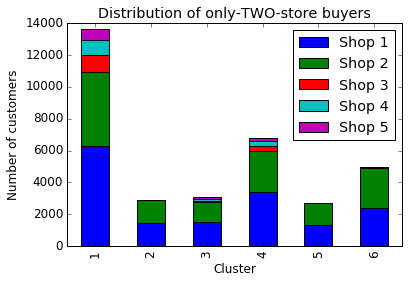

In [76]:
df2.plot(kind='bar',
           title='Distribution of only-TWO-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

In [77]:
df2.sum().sum()

34106.0

#### Without scaling this makes much more sense. Let's try clustering with respect to distance, and decide which better suits our purposes. 

In [78]:
# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = df[(df.shops_used == 2)][['distance_shop_1',
                                                                           'distance_shop_2',
                                         'distance_shop_3','distance_shop_4',
                                         'distance_shop_5']].values


# We split dataset into training set (70%) and test set (30%)
train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(17053, 5)


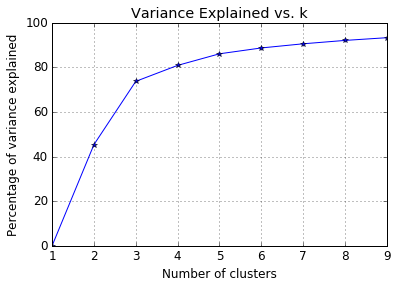

In [79]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


In [80]:
num_clusters = 4
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2) #k_means.fit(test_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0] #df_clusters['shop_1'] = test_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

In [81]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df2 = pd.DataFrame()
for k in range(5):
    df2['Shop ' + str(k+1)] = matrix_clusters[:,k]
df2.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]
df2

,Shop 1,Shop 2,Shop 3,Shop 4,Shop 5
1,3767.0,3767.0,3767.0,3767.0,3767.0
2,1836.0,1836.0,1836.0,1836.0,1836.0
3,5004.0,5004.0,5004.0,5004.0,5004.0
4,6446.0,6446.0,6446.0,6446.0,6446.0


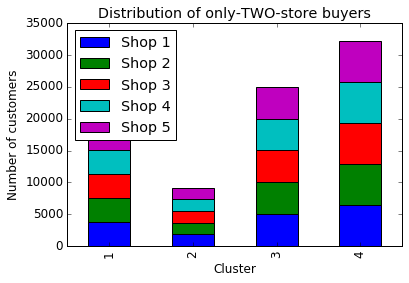

In [82]:
df2.plot(kind='bar',
           title='Distribution of only-TWO-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

#### Looks like segmenting the market of two store buyers according to unique products purchased is a better option

#### Clustering data for Exclusively one shop buyers

In [83]:
# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = df[df['shops_used']==1][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5']].values

train_2= unique_2
# We split dataset into training set (70%) and test set (30%)
#train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(11710, 5)


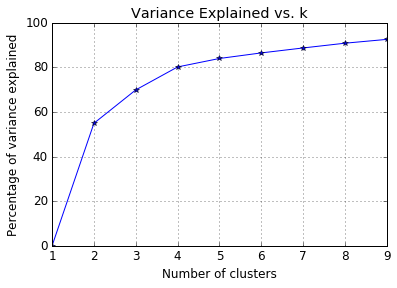

In [84]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


In [85]:
num_clusters = 4
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2) #k_means.fit(test_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0] #df_clusters['shop_1'] = test_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

/Users/tashlin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [86]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df2 = pd.DataFrame()
for k in range(5):
    df2['Shop ' + str(k+1)] = matrix_clusters[:,k]
df2.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]
df2

,Shop 1,Shop 2,Shop 3,Shop 4,Shop 5
1,4645.0,1843.0,449.0,478.0,326.0
2,1013.0,0.0,0.0,0.0,0.0
3,0.0,627.0,0.0,0.0,0.0
4,2329.0,0.0,0.0,0.0,0.0


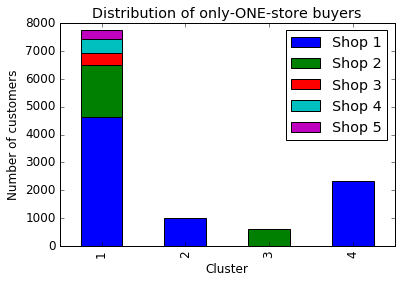

In [87]:
df2.plot(kind='bar',
           title='Distribution of only-ONE-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

In [88]:
df_clusters.head(10)

,shop_1,shop_2,shop_3,shop_4,shop_5,cluster
0,19,0,0,0,0,1
1,55,0,0,0,0,1
2,14,0,0,0,0,1
3,48,0,0,0,0,1
4,0,54,0,0,0,1
5,119,0,0,0,0,1
6,0,342,0,0,0,3
7,1,0,0,0,0,1
8,0,185,0,0,0,3
9,0,9,0,0,0,1


In [89]:
df_1 = pd.DataFrame(df[df['shops_used']==1])
df_1.shape[0]

11710

In [90]:
df_1.index = range(0,len(df_1))
df_1.shape[0]

11710

In [91]:
clus = df_clusters[['cluster']]
clus.shape[0]

11710

In [92]:
df_1 = pd.concat([df_1,clus],1)
df_1.shape[0]

11710

In [93]:
df_1.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_price_shop_5,freq,freq_shop_1,freq_shop_2,freq_shop_3,freq_shop_4,freq_shop_5,closest_shop,farthest_shop,cluster
0,7,2068.8428,2068.8428,2068.8428,20.0,19.0,47.157,2.481947,2.355105,1.0,...,0.0,19.000000,19.000000,0.000000,0.0,0.0,0.0,4,2,1
1,14,2788.3752,2788.3752,2788.3752,66.0,55.0,217.172,3.948582,3.398946,1.0,...,0.0,54.999997,54.999997,0.000000,0.0,0.0,0.0,2,4,1
2,17,2212.2993,2212.2993,2212.2993,16.0,14.0,222.804,15.914572,15.550928,1.0,...,0.0,13.999999,13.999999,0.000000,0.0,0.0,0.0,5,2,1
3,24,1679.1278,1679.1278,1679.1278,57.0,48.0,153.351,3.194812,2.426063,1.0,...,0.0,48.000000,48.000000,0.000000,0.0,0.0,0.0,4,2,1
4,25,935.1204,935.1204,935.1204,68.0,54.0,238.953,4.425056,3.380444,1.0,...,0.0,54.000001,0.000000,54.000001,0.0,0.0,0.0,2,4,1


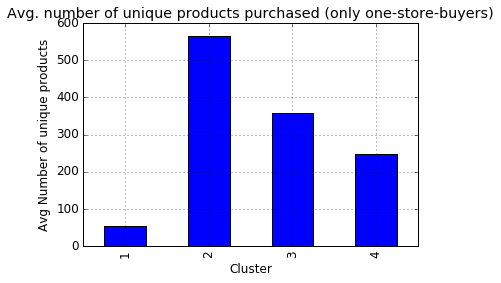

In [94]:
list_unique = []
for i in range(1,5):
    a = df_1[df_1['cluster']==i]['unique_products_purchased'].mean()
    list_unique.append(a)
dfAux = pd.DataFrame()
# Add columns
dfAux['Cluster'] = [1,2,3,4]
dfAux['Avg Number of unique products'] = list_unique

# Generate the plot
dfAux.plot(x='Cluster',y='Avg Number of unique products',kind='bar',
           title='Avg. number of unique products purchased (only one-store-buyers)',
           legend=False,grid=True)
plt.xlabel('Cluster')
plt.ylabel('Avg Number of unique products')
plt.show()

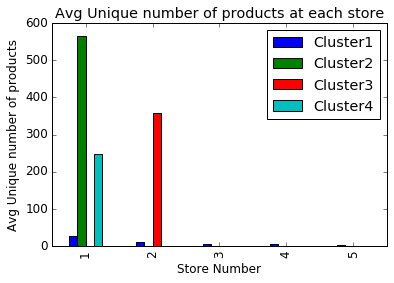

,Cluster1,Cluster2,Cluster3,Cluster4
1,26.293760,565.629812,0.000000,247.23787
2,10.766180,0.000000,358.046252,0.00000
3,6.725875,0.000000,0.000000,0.00000
4,6.182276,0.000000,0.000000,0.00000
5,3.704818,0.000000,0.000000,0.00000


In [95]:
list_ = []
for i in range (1,5):
    for k in range(1,6):
        a = 'unique_products_purchased_shop_'+str(k)
        b = df_1[df_1['cluster']==i][a].mean()
        list_.append(b)
testdf =pd.DataFrame()
fun= [0,5,10,15,20]
for i in range(len(fun)-1):
    c = 'Cluster'+str(i+1)
    testdf[c] = list_[fun[i]:fun[i+1]]
    
testdf.index = range(1,6)
testdf.plot.bar(x=None, y=None)
plt.xlabel('Store Number')
plt.ylabel('Avg Unique number of products')
plt.title('Avg Unique number of products at each store')
plt.show()
testdf

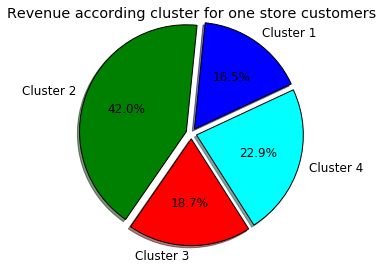

In [96]:
total_rev = df.amount_purchased.sum()
clus1_rev = df_1.amount_purchased.sum()

#distribution according to revenue
testdf= pd.DataFrame()
test = []

for i in range(1,5):
    a = 'amount_purchased'
    b = df_1[df_1['cluster']==i][a].sum()
    test.append(b)
testdf['amount_purchased'] = test

labels_ = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]
colors = ['blue','green','red','aqua']#list_purchase = np.array(list_purchase) 
#list_purchase = list_purchase*100./sum(list_purchase)
list_purch =  testdf['amount_purchased'].tolist()
explode = (0.05,0.05,0.05,0.05)
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purch,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=25)

plt.axis('equal')

plt.title('Revenue according cluster for one store customers')

plt.show()

#### Clustering data for Exclusively TWO shop buyers

In [97]:
#Before we tried with two store buyers, lets try with all customers according to the variety of products they purchase

# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = df[df['shops_used']==2][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5']].values

train_2= unique_2
# We split dataset into training set (70%) and test set (30%)
#train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(24362, 5)


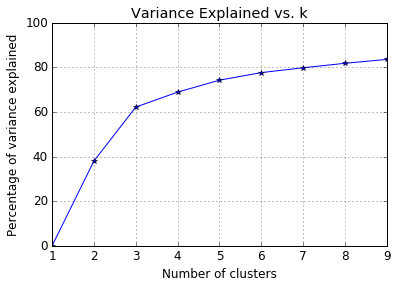

In [98]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


In [99]:
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2) #k_means.fit(test_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0] #df_clusters['shop_1'] = test_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

/Users/tashlin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


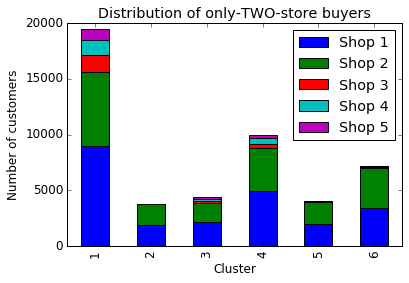

In [100]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df2 = pd.DataFrame()
for k in range(5):
    df2['Shop ' + str(k+1)] = matrix_clusters[:,k]
df2.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]
df2.plot(kind='bar',
           title='Distribution of only-TWO-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

In [101]:
df_2 = pd.DataFrame(df[df['shops_used']==2])
print df_2.shape[0]
df_2.index = range(0,len(df_2))
print df_2.shape[0]
clus = df_clusters[['cluster']]
print clus.shape[0]
df_2 = pd.concat([df_2,clus],1)
df_2.shape[0]

24362
24362
24362


24362

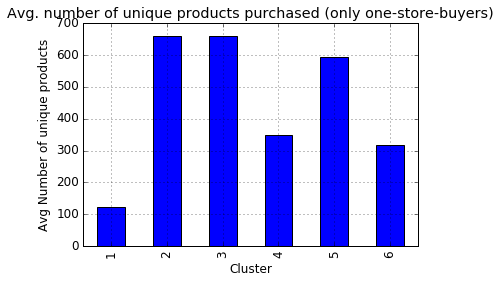

In [102]:
list_unique = []
for i in range(1,7):
    a = df_2[df_2['cluster']==i]['unique_products_purchased'].mean()
    list_unique.append(a)
dfAux = pd.DataFrame()
# Add columns
dfAux['Cluster'] = [1,2,3,4,5,6]
dfAux['Avg Number of unique products'] = list_unique

# Generate the plot
dfAux.plot(x='Cluster',y='Avg Number of unique products',kind='bar',
           title='Avg. number of unique products purchased (only one-store-buyers)',
           legend=False,grid=True)
plt.xlabel('Cluster')
plt.ylabel('Avg Number of unique products')
plt.show()

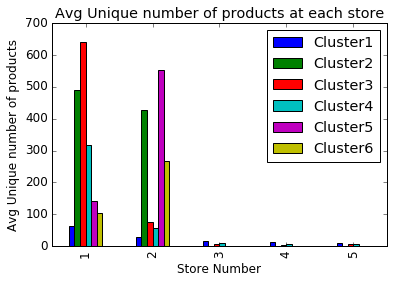

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6
1,62.142813,488.622139,639.930041,318.062048,143.145563,104.757143
2,30.254723,427.501330,76.289438,56.263052,551.344467,267.526891
3,16.105236,0.000000,7.070416,8.667671,0.722333,1.662185
4,13.972587,0.000000,4.692730,5.403815,0.043370,0.124370
5,10.637577,0.000000,6.512574,6.124900,0.147557,0.486275


In [103]:
list_ = []
testdf =pd.DataFrame()
for i in range (1,7):
    for k in range(1,6):
        a = 'unique_products_purchased_shop_'+str(k)
        b = df_2[df_2['cluster']==i][a].mean()
        list_.append(b)
        
fun= [0,5,10,15,20,25,30]
for i in range(len(fun)-1):
    c = 'Cluster'+str(i+1)
    testdf[c] = list_[fun[i]:fun[i+1]]

testdf.index = range(1,6)
testdf.plot.bar(x=None, y=None)
plt.xlabel('Store Number')
plt.ylabel('Avg Unique number of products')
plt.title('Avg Unique number of products at each store')
plt.show()
testdf

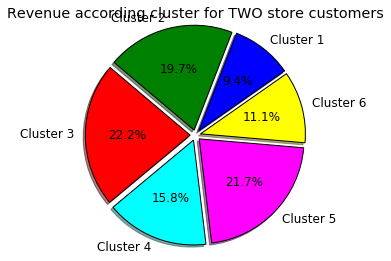

In [104]:
clus2_rev = df_2.amount_purchased.sum()

#distribution according to revenue
testdf= pd.DataFrame()
test = []

for i in range(1,7):
    a = 'amount_purchased'
    b = df_2[df_2['cluster']==i][a].sum()
    test.append(b)
testdf['amount_purchased'] = test

labels_ = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6"]
colors = ['blue','green','red','aqua','magenta','yellow']
#list_purchase = np.array(list_purchase) 
#list_purchase = list_purchase*100./sum(list_purchase)
list_purch =  testdf['amount_purchased'].tolist()
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purch,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=35)

plt.axis('equal')

plt.title('Revenue according cluster for TWO store customers')

plt.show()

#### Clustering data for Exclusively THREE shop buyers

In [105]:
#Before we tried with two store buyers, lets try with all customers according to the variety of products they purchase

# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = df[df['shops_used']==3][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5']].values

train_2= unique_2
# We split dataset into training set (70%) and test set (30%)
#train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(15676, 5)


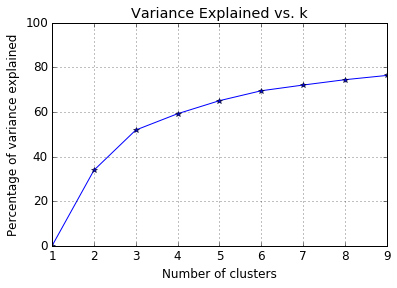

In [106]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


In [107]:
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2) #k_means.fit(test_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0] #df_clusters['shop_1'] = test_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

/Users/tashlin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


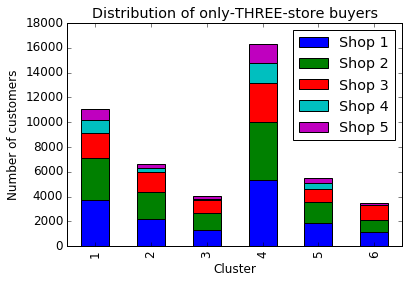

In [108]:
matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df2 = pd.DataFrame()
for k in range(5):
    df2['Shop ' + str(k+1)] = matrix_clusters[:,k]
df2.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]
df2.plot(kind='bar',
           title='Distribution of only-THREE-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

In [109]:
df_3 = pd.DataFrame(df[df['shops_used']==3])
print df_3.shape[0]
df_3.index = range(0,len(df_3))
print df_3.shape[0]
clus = df_clusters[['cluster']]
print clus.shape[0]
df_3 = pd.concat([df_3,clus],1)
df_3.shape[0]

15676
15676
15676


15676

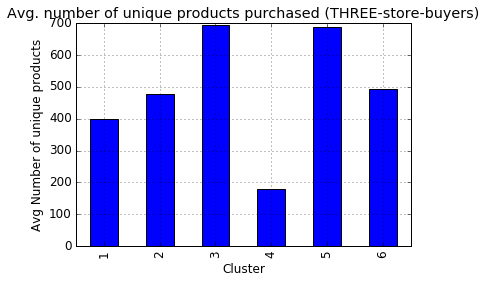

In [110]:
list_unique = []
for i in range(1,7):
    a = df_3[df_3['cluster']==i]['unique_products_purchased'].mean()
    list_unique.append(a)
dfAux = pd.DataFrame()
# Add columns
dfAux['Cluster'] = [1,2,3,4,5,6]
dfAux['Avg Number of unique products'] = list_unique

# Generate the plot
dfAux.plot(x='Cluster',y='Avg Number of unique products',kind='bar',
           title='Avg. number of unique products purchased (THREE-store-buyers)',
           legend=False,grid=True)
plt.xlabel('Cluster')
plt.ylabel('Avg Number of unique products')
plt.show()

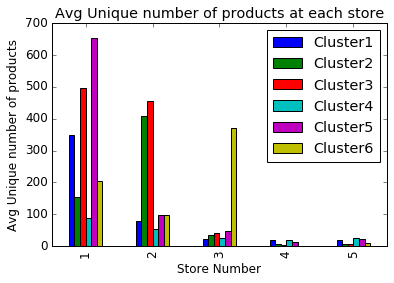

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6
1,348.812737,154.114441,496.771407,88.706725,651.647666,205.923941
2,77.882927,408.786104,455.269546,54.581955,97.447883,96.351772
3,23.962602,35.000908,42.463142,24.876883,47.659609,372.066551
4,20.763957,6.397366,4.448995,20.909408,13.742671,1.330164
5,17.920596,6.011353,5.585257,26.093532,21.806189,8.975799


In [111]:
list_ = []
testdf =pd.DataFrame()
for i in range (1,7):
    for k in range(1,6):
        a = 'unique_products_purchased_shop_'+str(k)
        b = df_3[df_3['cluster']==i][a].mean()
        list_.append(b)
        
fun= [0,5,10,15,20,25,30]
for i in range(len(fun)-1):
    c = 'Cluster'+str(i+1)
    testdf[c] = list_[fun[i]:fun[i+1]]

testdf.index = range(1,6)
testdf.plot.bar(x=None, y=None)
plt.xlabel('Store Number')
plt.ylabel('Avg Unique number of products')
plt.title('Avg Unique number of products at each store')
plt.show()
testdf

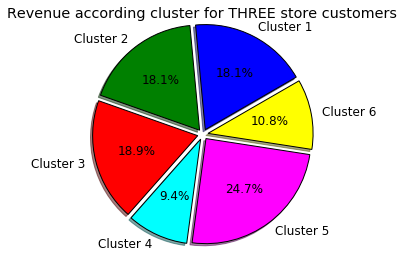

In [112]:
clus3_rev = df_3.amount_purchased.sum()

#distribution according to revenue
testdf= pd.DataFrame()
test = []

for i in range(1,7):
    a = 'amount_purchased'
    b = df_3[df_3['cluster']==i][a].sum()
    test.append(b)
testdf['amount_purchased'] = test

labels_ = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6"]
colors = ['blue','green','red','aqua','magenta','yellow']
#list_purchase = np.array(list_purchase) 
#list_purchase = list_purchase*100./sum(list_purchase)
list_purch =  testdf['amount_purchased'].tolist()
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purch,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=30)

plt.axis('equal')

plt.title('Revenue according cluster for THREE store customers')

plt.show()

#### Clustering data for Exclusively one shop buyers

In [113]:
# We import tools to split dataset into train and test sets
from sklearn.cross_validation import train_test_split

# We focus on customers who purchased exactly in only two shops and grab only unique products purchased in every store 
# as well as distance to each of them.
unique_2 = df[df['shops_used']==4][['unique_products_purchased_shop_1',
                                                                           'unique_products_purchased_shop_2',
                                         'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
                                         'unique_products_purchased_shop_5']].values

train_2= unique_2
# We split dataset into training set (70%) and test set (30%)
#train_2, test_2 = train_test_split(unique_2, train_size=0.7)
# We get an idea of the number of records in the training set
print train_2.shape

(6875, 5)


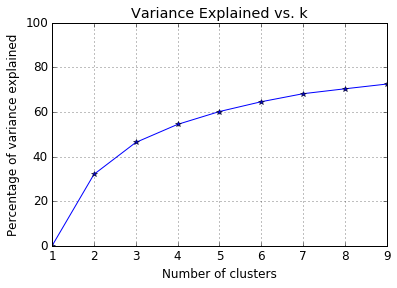

In [114]:
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,10)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(train_2) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(train_2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(train_2)**2)/train_2.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')


/Users/tashlin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


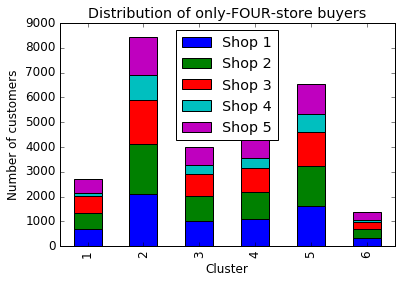

In [115]:
num_clusters = 6
k_means = KMeans(n_clusters=num_clusters)
kMeans = k_means.fit(train_2) #k_means.fit(test_2)
clusters_labels = kMeans.predict(train_2) + 1

df_clusters = pd.DataFrame()
df_clusters['shop_1'] = train_2[:,0] #df_clusters['shop_1'] = test_2[:,0]
df_clusters['shop_2'] = train_2[:,1]
df_clusters['shop_3'] = train_2[:,2]
df_clusters['shop_4'] = train_2[:,3]
df_clusters['shop_5'] = train_2[:,4]
df_clusters['cluster'] = clusters_labels

matrix_clusters = np.zeros((num_clusters,5))
for m in range(num_clusters):
    #print "Cluster " , m+1
    for k in range(5):
        text = 'shop_' + str(k+1) 
        sum_ = sum((df_clusters.cluster == m+1) & (df_clusters['shop_'+str(k+1)] != 0 ))
        #print text, sum_
        matrix_clusters[m,k] = sum_
    #print "#######"*2

    
df2 = pd.DataFrame()
for k in range(5):
    df2['Shop ' + str(k+1)] = matrix_clusters[:,k]
df2.index = range(1,num_clusters+1) #['Cluster '+ str(i) for i in range(1,6)]
df2.plot(kind='bar',
           title='Distribution of only-FOUR-store buyers',stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

In [116]:
dist = df[df['shops_used']==4]

In [117]:
df_4 = pd.DataFrame(df[df['shops_used']==4])
print df_4.shape[0]
df_4.index = range(0,len(df_4))
print df_4.shape[0]
clus = df_clusters[['cluster']]
print clus.shape[0]
df_4 = pd.concat([df_4,clus],1)
print df_4.shape[0]

6875
6875
6875
6875


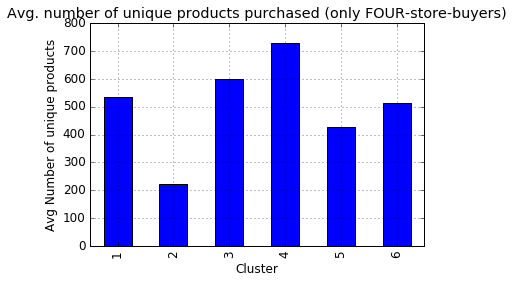

In [118]:
list_unique = []
for i in range(1,7):
    a = df_4[df_4['cluster']==i]['unique_products_purchased'].mean()
    list_unique.append(a)
dfAux = pd.DataFrame()
# Add columns
dfAux['Cluster'] = [1,2,3,4,5,6]
dfAux['Avg Number of unique products'] = list_unique

# Generate the plot
dfAux.plot(x='Cluster',y='Avg Number of unique products',kind='bar',
           title='Avg. number of unique products purchased (only FOUR-store-buyers)',
           legend=False,grid=True)
plt.xlabel('Cluster')
plt.ylabel('Avg Number of unique products')
plt.show()

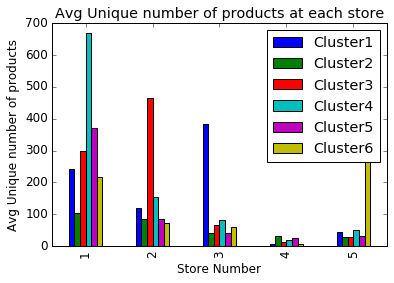

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6
1,242.864706,102.511617,299.205384,669.391462,370.723105,216.971098
2,120.277941,84.529635,465.127617,152.895550,83.992665,72.063584
3,384.444118,42.095780,66.831505,82.704814,41.937653,59.517341
4,6.772059,32.027501,12.650050,19.409628,25.605746,8.037572
5,45.629412,27.914177,28.748754,52.194369,31.709046,383.450867


In [119]:
list_ = []
testdf =pd.DataFrame()
for i in range (1,7):
    for k in range(1,6):
        a = 'unique_products_purchased_shop_'+str(k)
        b = df_4[df_4['cluster']==i][a].mean()
        list_.append(b)
        
fun= [0,5,10,15,20,25,30]
for i in range(len(fun)-1):
    c = 'Cluster'+str(i+1)
    testdf[c] = list_[fun[i]:fun[i+1]]

testdf.index = range(1,6)
testdf.plot.bar(x=None, y=None)
plt.xlabel('Store Number')
plt.ylabel('Avg Unique number of products')
plt.title('Avg Unique number of products at each store')
plt.show()
testdf

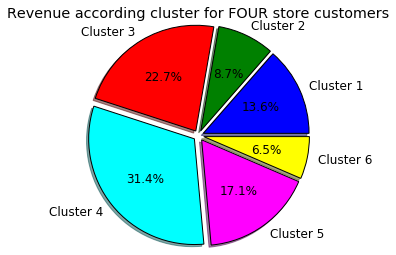

In [120]:
clus4_rev = df_4.amount_purchased.sum()

#distribution according to revenue
testdf= pd.DataFrame()
test = []

for i in range(1,7):
    a = 'amount_purchased'
    b = df_4[df_4['cluster']==i][a].sum()
    test.append(b)
testdf['amount_purchased'] = test

labels_ = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6"]
colors = ['blue','green','red','aqua','magenta','yellow']
#list_purchase = np.array(list_purchase) 
#list_purchase = list_purchase*100./sum(list_purchase)
list_purch =  testdf['amount_purchased'].tolist()
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purch,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=0)

plt.axis('equal')
#plt.ylabel('test',fontsize=20)
plt.title('Revenue according cluster for FOUR store customers')

plt.show()

#### Refer to Capstone Final Paper for FULL analysis

### Conclusion
After an in-depth analysis into COOP Italia’s customers for a specific unknown geolocation it can be concluded that product variety is the driving factor for market trends and customer habits. Distance is less of a factor than what might have been initially thought. Customers are willing to travel and choose a farther store over a store closer to them, if that store suits them better in terms of variety. If we segment customers based solely on the unique products purchased, it gives an ample amount of insight, that enables, COOP Italia to better understand, and better provide for their customers. 
